### **1. 선형회귀**

1-0 회귀 분석 프로세스

사전 검증 -> 모델 생성 및 모델 fit-> 모델 평가 -> 모델 성능 개선

1.사전 검증 
> - 데이터 탐색 및 전처리
> - 결측치 처리,이상치 처리

2. 모델 생성 및 모델 fit
> - 회귀 모델 생성,모델 설정,모델 학습
> - 모델의 유의성 검정( F-검정,T-검정)

3. 모델 성능 평가 
> - R-squared
> - 회귀 분석 후 검증 가능한 가설 검토


4. 모델 성능 개선
> - 필요 없는 변수 제거
> - 비선형 모델 활용

1-1 다중선형회귀의 수식적 이해

- 수식의 변수 설명
    - $y_i$ : i번째 종속 변수(우리가 관심 있는 값)
    - $X_{1i}, X_{2i}, ... , X_{ki}$ : i번째 y에 대한 여러 개의 설명변수(독립 변수)
    - $\beta_0$ : 절편, 설명변수(X)가 모두 0일 때 y의 값
    - $\beta_1, \beta_2, ..., \beta_k$ : 설명변수에 의한 회귀 계수 (각 변수 X의 영향력)
        
        ex) y: 학점, $X_1$=중간고사, $X_2$=기말고사, $X_3$=과제 일때,
         $y=40X_1+40X_2+20X_3$ 이라고 하면, 학점을 결정짓는 요인은 중간고사가 40%, 기말고사가 40%, 과제가 20% 입니다. 
        이때 40, 40, 20의 값이 차례대로 $\beta_1, \beta_2, \beta_3$ 입니다. 
        
    - $\epsilon_i$  : 오차항
    - 선형회귀식은 결국 종속변수 y에 대한 설명변수의 **가중평균**이라고 할 수 있음
    - 설명변수에 가중치를 곱해 더함으로써 y를 얼마나 잘 설명하는지를 나타냄

1-2 다중선형회귀의 기본가정


**가정1 선형성**
> - 종속변수와 설명변수 간의 관계가 **선형적**이어야 함
> - 기본 가정 중 당연한 가정

**가정2 독립성**
> - 각각의 설명 변수가 서로 선형독립적이어야함
> - 선형독립적이지 않은 경우 다중공선성이 있다고 말함

**가정3 오차항의 평균은 0이다**
> - 오차항 ($\epsilon$): 실제 값과 예측 값 사이의 차이
> - 오차항은 다른 말로 white noise(백색 잡음)이라고 하는데, 백색 잡음의 성질을 만족하기
    필요한 가정 중 하나

**가정4 등분산성**
> - 오차항$(\epsilon)$의 분산($\sigma^2$) 이 일정해야 한다는 가정입니다
> - 오차항의 분산이 일정하지 않은 경우, **이분산성**(heteroscedasticity)이 있다고 함
    


**가정5 오차항은 자기상관되어 있지 않다**
> - 오차항의 공분산은 항상 0이 되어야 된다는 가정
> - 오차항의 공분산이 0이 아닌 경우, 자기상관이 있다고 합니다

**가정6 정규성**
> - 오차항이 정규분포를 따른다는 가정
> - 가정 6은 위배되어도 다중선형회구분석의 결과에 큰 영향을 주지 않음
>

***회귀 분석 전과 후에 검증해야 할 가정 정리***

| 기본 가정 | 회귀 분석 전에 검증 가능? | 회귀 분석 후에 검증 가능? | 검증 방법 |
| --- | --- | --- | --- |
| 선형성 | ✅ | ✅ | scattor plot 찍어보기 |
| 독립성 (다중공선성) | ✅ | ✅ | VIF 지수, 상관계수 |
| 오차항 평균이 0이다 | ❌ | ✅ | np.mean(residuals) |
| 등분산성 | ❌ | ✅ | 잔차의 도표화 |
| 오차항 자기상관 없다 | ✅ (회귀 분석 전에는  간접적으로 검증 가능, 분석 후에 최종 검증) | ✅ | Durbin-Watson 검정(분석 후) |
| 정규성 | ❌ | ✅ | Shapiro-Wilk 검증, Q-Q plot |

1-3 회귀분석 평가 방법

` 회귀 분석의 결과의 유효성을 판단하기 위해 시각화하거나 통계지표 이용`

**시각화**

: 회귀선이 데이터를 요약할 수 있지만 어떤 시각자료가 가장 잘 요약했는지는 알 수없음
<BR> 두 집단의 차이의 정도를 검정을 했듯, 통계지표를 활용하는 것이 좋음

**통계지표**

모델의 유의성 검정

| 검정 종류 | 검정 대상 | 목적 | 해석 기준 |
| --- | --- | --- | --- |
| F-검정 | **전체 모델** | **회귀 모델이 유의미**한지 검정 | p < 0.05이면 회귀 모델이 유의미하다 |
| T-검정 | **개별 변수** | **특정 독립 변수가 유의미**한지 검정 | p < 0.05이면 해당 변수가 유의미하다 |

`F-statistic,Prob(F-statistic)`

F-statistic은 회귀 모델이 유의미한지 검정하는 지표
<BR>귀무가설 $H_0$: **모든 회귀 계수**가 0이다 (독립 변수들이 종속 변수들과 관계가 없다)
<BR>대립가설 $H_1$: 적어도 하나의 회귀 계수는 0이 아니다 (독립 변수 중 하나 이상이 종속 변수에 영향을 준다)

`T-statistc`

T-statistic은 각 독립 변수가 종속 변수 y에 유의미한 영향을 미치는지 판단하는 지표

- 귀무가설 $H_0$: **해당 변수의 회귀 계수**가 0이다 (이 변수는 종속 변수에 영향을 미치지 않는다)
- 대립가설 $H_1$: **해당 변수의 회귀 계수**는 0이 아니다 (이 변수는 종속 변수에 유의미한 영향을 준다)

p-value(**P>|t|**)를 기준으로 가설 검정을 수행합니다. 

- x1: P>|t| 값이 0.000이므로 0.05보다 작다 → **x1**이 종속 변수에 **유의미한 영향**을 미친다.
- x2: P>|t| 값이 0.031이므로 0.05보다 작다 → **x2**가 종속 변수에 **유의미한 영향**을 미친다
- x3: P>|t| 값이 0.569이므로 0.05보다 크다 → **x3**가 종속 변수에 **유의미한 영향을 미치지 않는다.**

모델의 성능 평가

`결정 계수 (R-squared, R^2):`

> - R^2는 결정 계수의 약어로, 회귀 분석에서 모델이 설명하는 데이터의 총 변동(평균과의 차이) 중에서 설명된 비율을 나타냄
> - $\bar{Y}$: 평균 / $\hat{Y}$: 예측 값 / $Y$: 실제 값
> - 모델이 데이터를 얼마나 잘 설명하는지 측정하는 지표로, 0과 1 사이의 값으로 나타남
> - 1에 가까울수록, SSR과 SST의 값이 비슷해지고, SSE는 0에 가까워지므로 모델이 데이터를 잘 설명한다고 할 수 있음.
> - R-squared 값이 0이면, 데이터들의 평균을 구한 것과 모델로 예측을 한 것이 동일한 것으로, 모델이 데이터를 전혀 설명하지 못한다고 할 수 있음


조정된 결정 계수

> - R^2는 독립 변수의 개수가 증가하면 증가할수록 자연스레 증가함 -> 데이터와 큰 관련성이 없는 변수를 추가해도 R-squre값은 높아짐
> - 따라서 변수의 개수 증가에 덜 민감하도록 조정한 지표가 Ajusted R^2 

`AIC,BIC(SC)`

두 지표 모두 정보기준이라고도 불리며, 값이 낮을수록 좋다고 평가
> - AIC = Akaike information criterion
> - BIC(SC) = Schwarz Criterion, BIC = Bayesian Information Criterion


2. 비선형 회귀

**2-1 다항식 회귀모델**

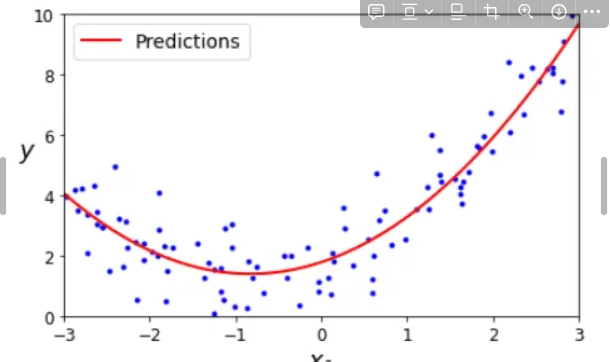

> - 기존의 선형 회귀: $Y=a+bX$
> - 다항식 회귀 모델: $Y=a+bX+cX^2+dX^3+\cdot\cdot\cdot$의 형태로, 독립 변수에 **거듭제곱 항**을 추가하여 데이터의 **곡선적(비선형적) 특성을 모델링**

2-2 지수 회귀모델

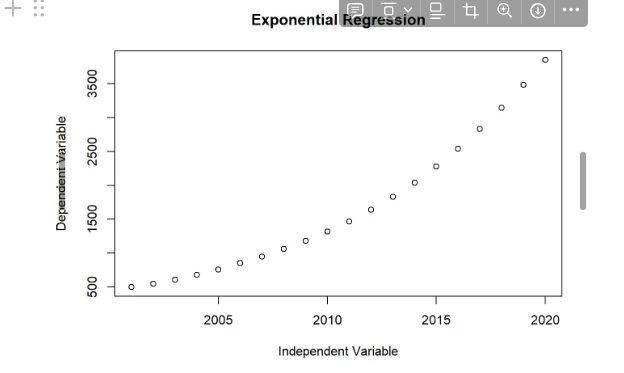

> - 종속 변수가 지수적으로 변화하는 관계를 모델링할 때 사용
> - 값이 시간에 따라 지수적으로 증가하거나 감소하는 경우 적합
> - 기술 발전, 투자 수익률 증가 등


1. 종속 변수 Y에 로그함수를 적용
2. 로그 변환된 Y와 기존의 독립변수 X에 대해 선형 회귀 적용
→ 모델이 ln Y(로그 변환된 Y)와 X의 선형 관계를 학습
3. Y값을 예측 시, 모델이 예측한 Y값에 지수함수$(e^x)$를 적용하여 로그 변환하기 전 Y로 변형

2-3 로그 회귀모델

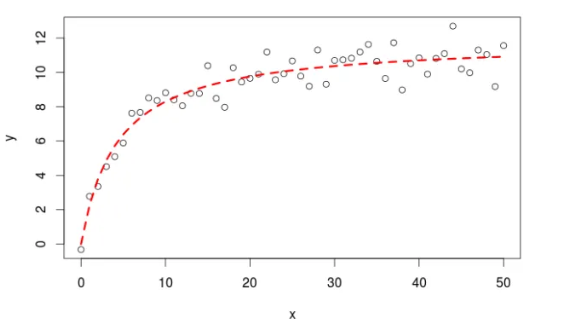|

> - 종속 변수와 독립 변수 간의 관계가 로그 함수를 통해 더 잘 표현될 때 사용 가능
> - 데이터가 초기에 빠르게 증가하고 점차 증가율이 줄어드는 패턴을 보일 때 효과적(인구 성장, 감염병의 확산 등)

2-4 스플라인 회귀

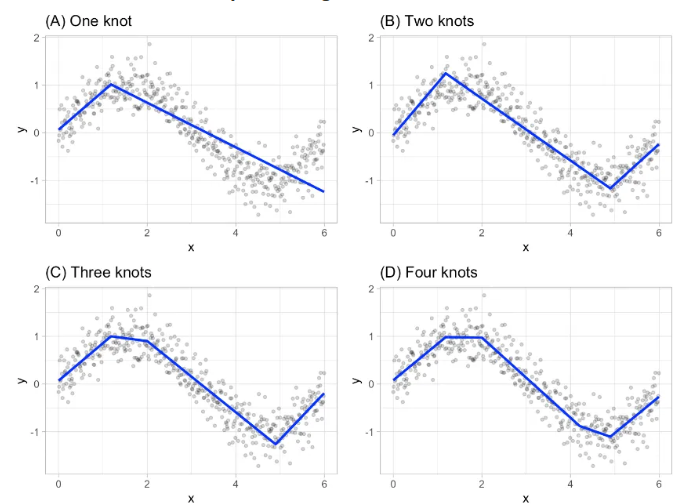

> - 데이터를 구간 별로 나누고 각 구간에서 다른 선형 또는 비선형 함수를 적용하여 예측하는 방식
> - 데이터 패턴이 여러 구간에서 서로 다르게 나타날 때 유용
> - 계절에 따라 판매량이 변화하는 소매 데이터 분석 등에서 적합